## Network Science Lab 1

### Task 1: Barabasi-Albert network

The Barabasi-Albert model for complex networks is based on the idea that networks evolve over time and that new nodes are more likely to link to high-degree nodes. It is (probably) the single-most important model in the field of network science as it reproduces important qualitative features seen in large complex real-world networks.
We will study this model later in the term, and in this task, you will use NetworkX to generate B-A networks and investigate their properties.

1) The B-A model requires two input parameters: the total number of nodes (*N*), and the number of links (*L*)  added between a new node and the existing network upon its introduction. Use the function *nx.barabasi_albert_graph* to generate a B-A graph with *N=500* and *L=4*. Draw your graph (with node_size=6) and zoom into the figure and look around -- do you see any hubs? (Note that the figure will have to open in a separate window for the zoom option to be available)

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [16]:
#Run this cell first
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
%matplotlib qt 
#Uncomment the line above to (hopefully) allow interactive figure windows to be created outside of notebook

g = nx.barabasi_albert_graph(500,4)
nx.draw(g, node_size = 6)
plt.show() 

2) Now, generate a B-A graph with *N=5000*, *L=4*, and a $G_{Np}$ graph with *N=5000* and *P=0.002*.
Compute the degree distributions for these graphs and plot them on a log-log plot.

In [12]:
B_A = nx.barabasi_albert_graph(5000,4)
Grandom = nx.gnp_random_graph(5000,0.002)

deg_dis_ba = nx.degree_histogram(B_A)
deg_dis_gr = nx.degree_histogram(Grandom)
plt.loglog(deg_dis_ba)
plt.loglog(deg_dis_gr)
plt.show()

2025-01-16 22:08:16.607 python[6382:146171] +[IMKClient subclass]: chose IMKClient_Legacy
2025-01-16 22:08:16.607 python[6382:146171] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


3) Compute and compare the average clustering coefficients for the $G_{Np}$ and B-A graphs.

In [14]:
print(np.mean(list(nx.clustering(B_A))))
print(np.mean(list(nx.clustering(Grandom))))

2499.5
2499.5


### Task 2: Adjacency matrices and Numpy

1. An $N$-node star graph has $N-1$ nodes with degree $1$ and $1$ node with degree $N-1$. Use Numpy (and not NetworkX) to generate $\mathbf{\textrm{A}}_1$, the adjacency matrix for this graph. Number the nodes from $0$ to $N-1$ with node $0$ corresponding to the central high-degree node. You should avoid using loops for this task if you can. An example with $N=8$:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Star_network_7.svg/180px-Star_network_7.svg.png">

In [24]:

def star_A(N):
    A = np.zeros([N,N], dtype = float)
    row_0_list = [0] + ([1]*(N-1))
    A[0] = np.array(row_0_list)
    A[1:, 0] = 1
    return A

A_1 = star_A(10)
A_1

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

2. Now consider a *closed* star graph where a "ring" of links is placed around an ordinary star graph. Then, the  graph will have $1$ node with degree $N-1$ and $N-1$ nodes with degree $3$. Use Numpy to create $\mathbf{\textrm{A}}_2$, the adjacency matrix for this graph. The function *np.diag* may be helpful.

In [27]:

def ring_star_A(N):
    A = np.zeros([N,N], dtype = float)
    A[0, 2:] = 1
    A[2:, 0] = 1
    super_diag = np.diag([1]*(N-1), k = 1)
    sub_diag = np.diag([1]*(N-1), k = -1)
    A[1, N-1] = 1
    A[N-1, 1] = 1
    return A + super_diag + sub_diag

A_2 = ring_star_A(6)
A_2

array([[0., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1.],
       [1., 1., 0., 0., 1., 0.]])

3. Verify that $\rm (\mathbf{A}_2+\mathbf{I})(\mathbf{A}_2+\mathbf{I})^{-1} = \mathbf{I}$

In [30]:

def Id_check(N):
    A_2 = ring_star_A(N)
    return np.linalg.matmul(A_2 + np.diag([1]*N),np.linalg.inv(A_2 + np.diag([1]*N)))

Id_check(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

4. Finally, use NetworkX to convert $\mathbf{\textrm{A}}_2$ into a NetworkX graph, and then display the graph 

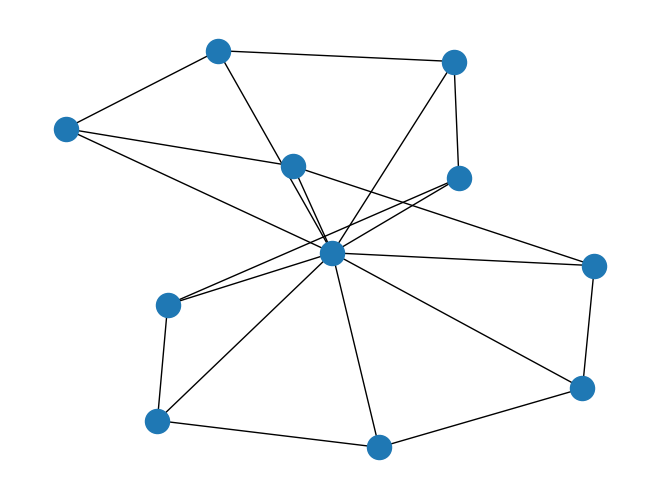

In [47]:
G = nx.from_numpy_array(ring_star_A(11))

plt.figure()
nx.draw(G)
plt.show()